In [1]:
# import the required libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [2]:
# reading the csv database
df = pd.read_csv('heart_v2.csv')

In [3]:
# get the list of columns
df.columns

Index(['age', 'sex', 'BP', 'cholestrol', 'heart disease'], dtype='object')

In [4]:
# get the info of the database
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [5]:
# get the sample of the dataset
df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [6]:
# putting feature variable to X
X = df.drop('heart disease', axis=1)
X.head()

,age,sex,BP,cholestrol
0,70,1,130,322
1,67,0,115,564
2,57,1,124,261
3,64,1,128,263
4,74,0,120,269


In [7]:
# putting response variable to y
y = df['heart disease']
y.head()

0    1
1    0
2    1
3    0
4    0
Name: heart disease, dtype: int64

In [8]:
# import for creating train test split
from sklearn.model_selection import train_test_split

In [9]:
# create training and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((189, 4), (81, 4), (189,), (81,))

In [10]:
# import library for decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [11]:
# create decision tree classifier modela and fit it with hyperparameter max_depth=3
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [12]:
# importing libraries for tree vizualizatoin
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, pygraphviz

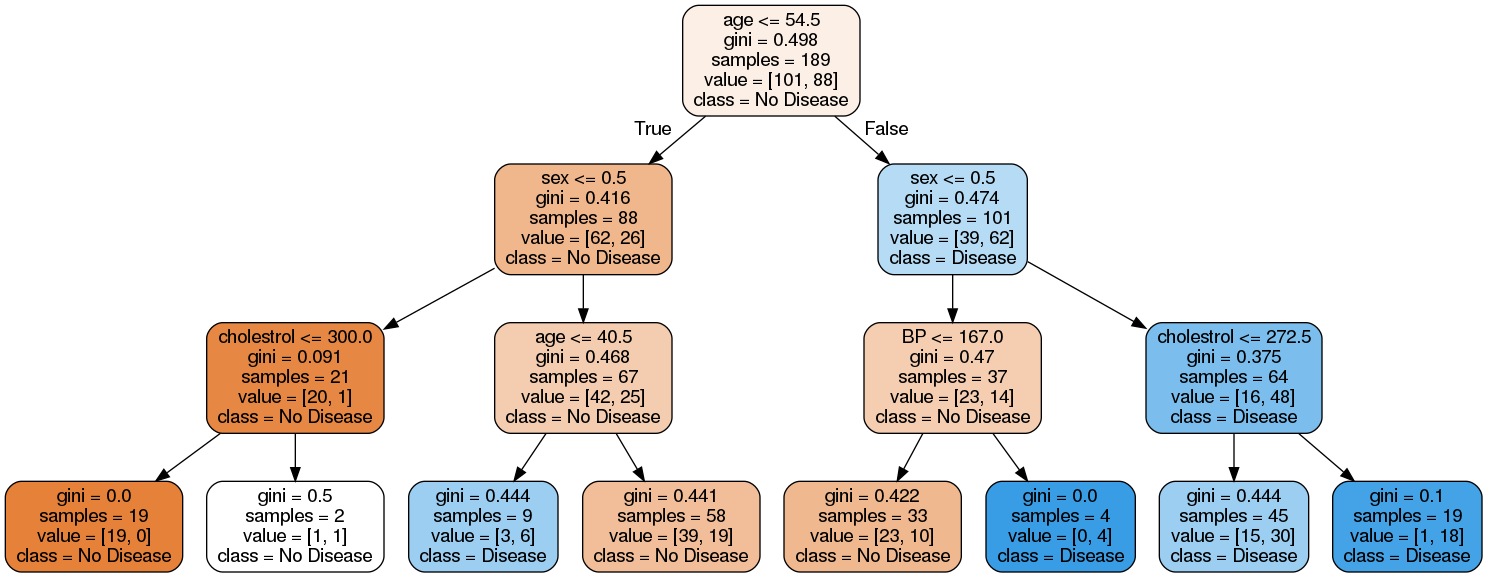

In [13]:
# plot the tree
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, filled=True, rounded=True, feature_names=X.columns, class_names=['No Disease', 'Disease'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

### Evaluating Model Performance

In [14]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [15]:
# import library for confusion maxtrix and accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score

In [16]:
# get accuracy score on train dataset
print(accuracy_score(y_train, y_train_pred))

0.7407407407407407


In [17]:
# get confusion matrix on train datase
confusion_matrix(y_train, y_train_pred)

array([[82, 19],
       [30, 58]])

In [18]:
# get accuracy score on test dataset
print(accuracy_score(y_test, y_test_pred))

0.6049382716049383


In [19]:
# get confusion_matrix on test dataset
confusion_matrix(y_test, y_test_pred)

array([[35, 14],
       [18, 14]])

### Hypermeter Usage

In [20]:
# create function to plot decision tree
def get_dt_graph(dt_classifier):
    dot_data = StringIO()
    export_graphviz(dt_classifier, out_file=dot_data, filled=True, rounded=True, feature_names=X.columns, class_names=['No Disease', 'Disease'])
    
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

In [21]:
# create funcation to evaluate a model performance
def evaluate_model(dt_classifier):
    print("Train accuracy: ", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Confusion Matrix of Tain data set:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy: ", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Confusion Matrix of Test Data set:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

#### Without Setting any hyperparameter

In [22]:
# create a model
dt_default = DecisionTreeClassifier(random_state=42)

# fit the data
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

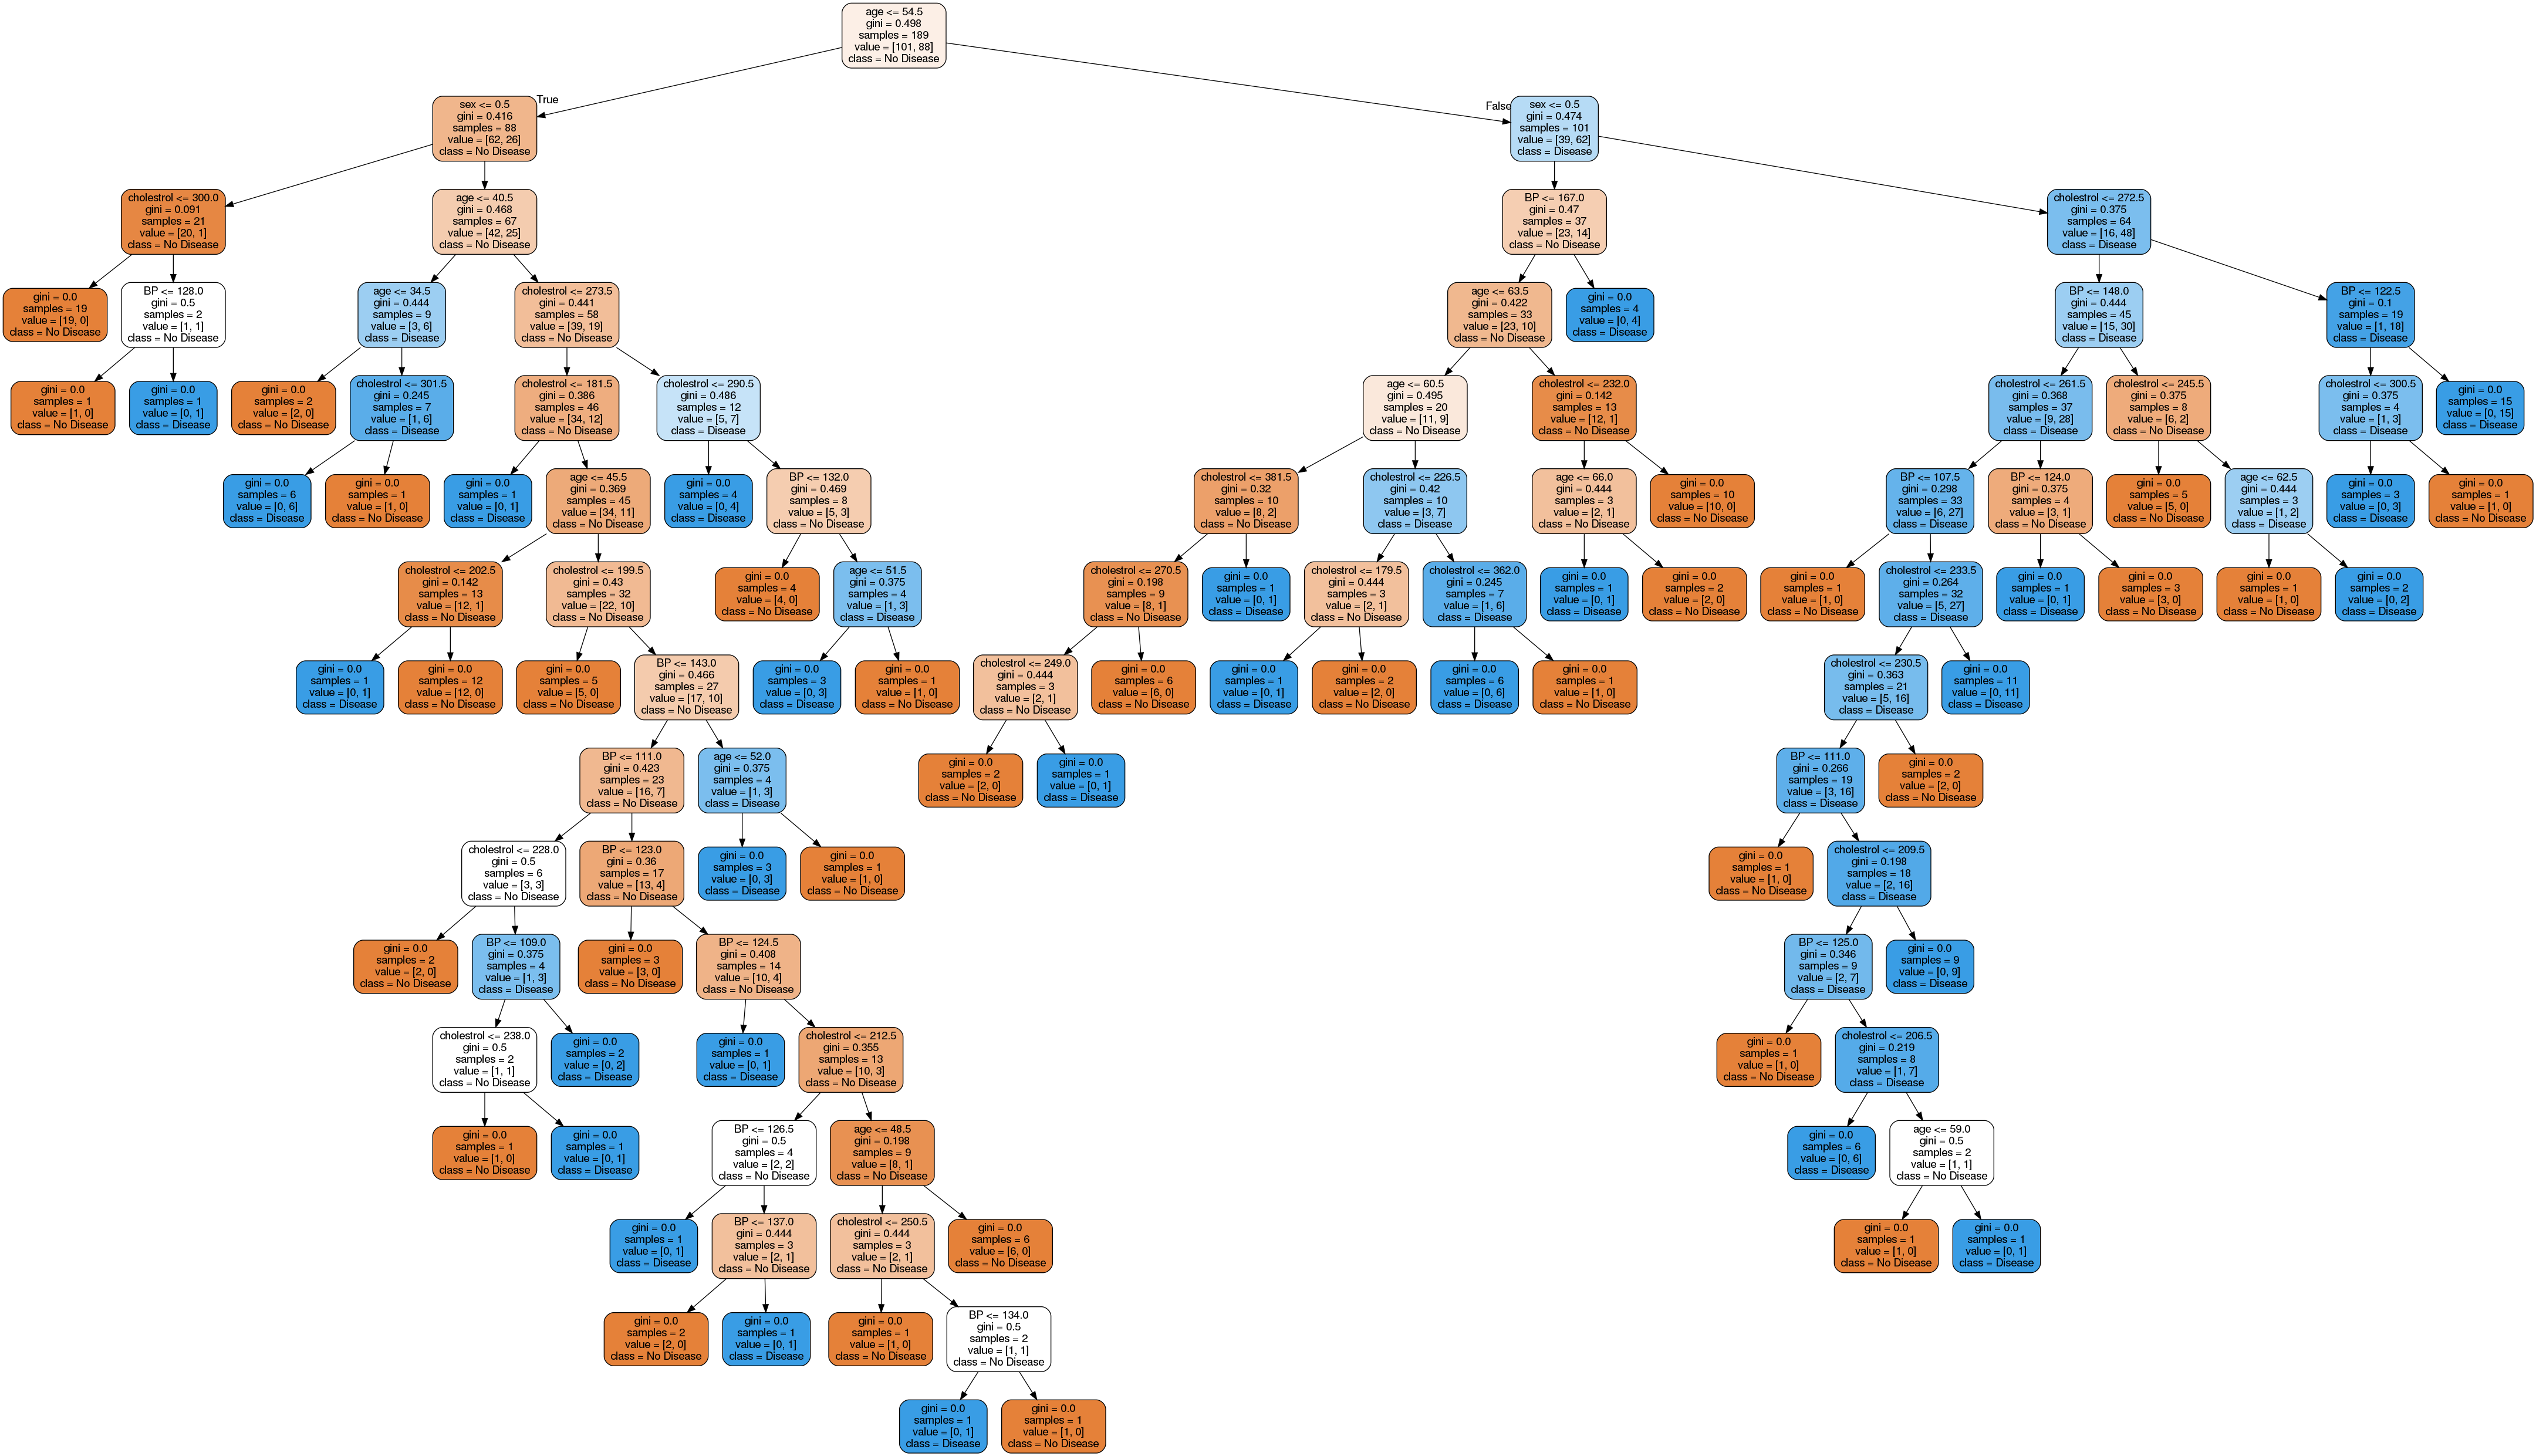

In [23]:
# plot the graph
gph = get_dt_graph(dt_default)
Image(gph.create_png())

In [24]:
evaluate_model(dt_default)

Train accuracy:  1.0
Confusion Matrix of Tain data set:
[[101   0]
 [  0  88]]
--------------------------------------------------
Test Accuracy:  0.6296296296296297
Confusion Matrix of Test Data set:
[[31 18]
 [12 20]]


#### Controlling the depth of tree

In [25]:
"""
DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    class_weight=None,
    ccp_alpha=0.0,
)
"""

"\nDecisionTreeClassifier(\n    *,\n    criterion='gini',\n    splitter='best',\n    max_depth=None,\n    min_samples_split=2,\n    min_samples_leaf=1,\n    min_weight_fraction_leaf=0.0,\n    max_features=None,\n    random_state=None,\n    max_leaf_nodes=None,\n    min_impurity_decrease=0.0,\n    min_impurity_split=None,\n    class_weight=None,\n    ccp_alpha=0.0,\n)\n"

In [26]:
# create a model
dt_depth = DecisionTreeClassifier(max_depth=3)

# fit the model
dt_depth.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

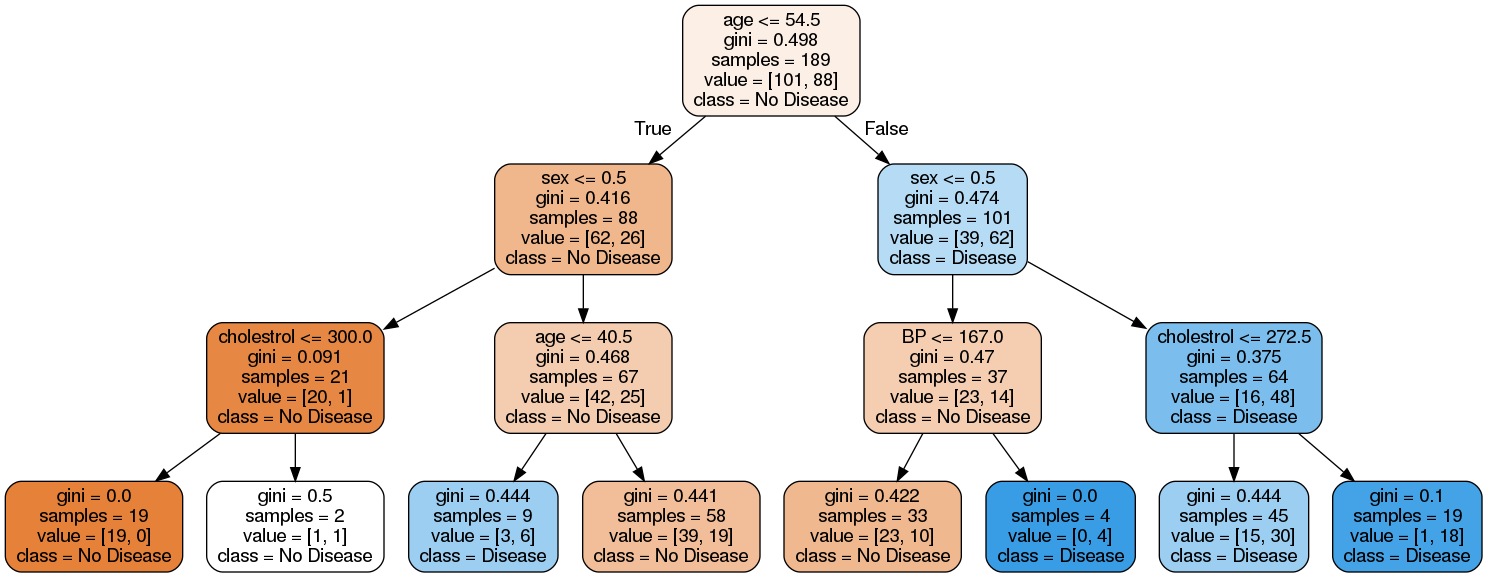

In [27]:
# plot the model
gph = get_dt_graph(dt_depth)
Image(gph.create_png())

In [28]:
evaluate_model(dt_depth)

Train accuracy:  0.7407407407407407
Confusion Matrix of Tain data set:
[[82 19]
 [30 58]]
--------------------------------------------------
Test Accuracy:  0.6049382716049383
Confusion Matrix of Test Data set:
[[35 14]
 [18 14]]


#### using minimum samples before split

In [29]:
# create a model
dt_min_split = DecisionTreeClassifier(min_samples_split=20)

# fit the model
dt_min_split.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=20)

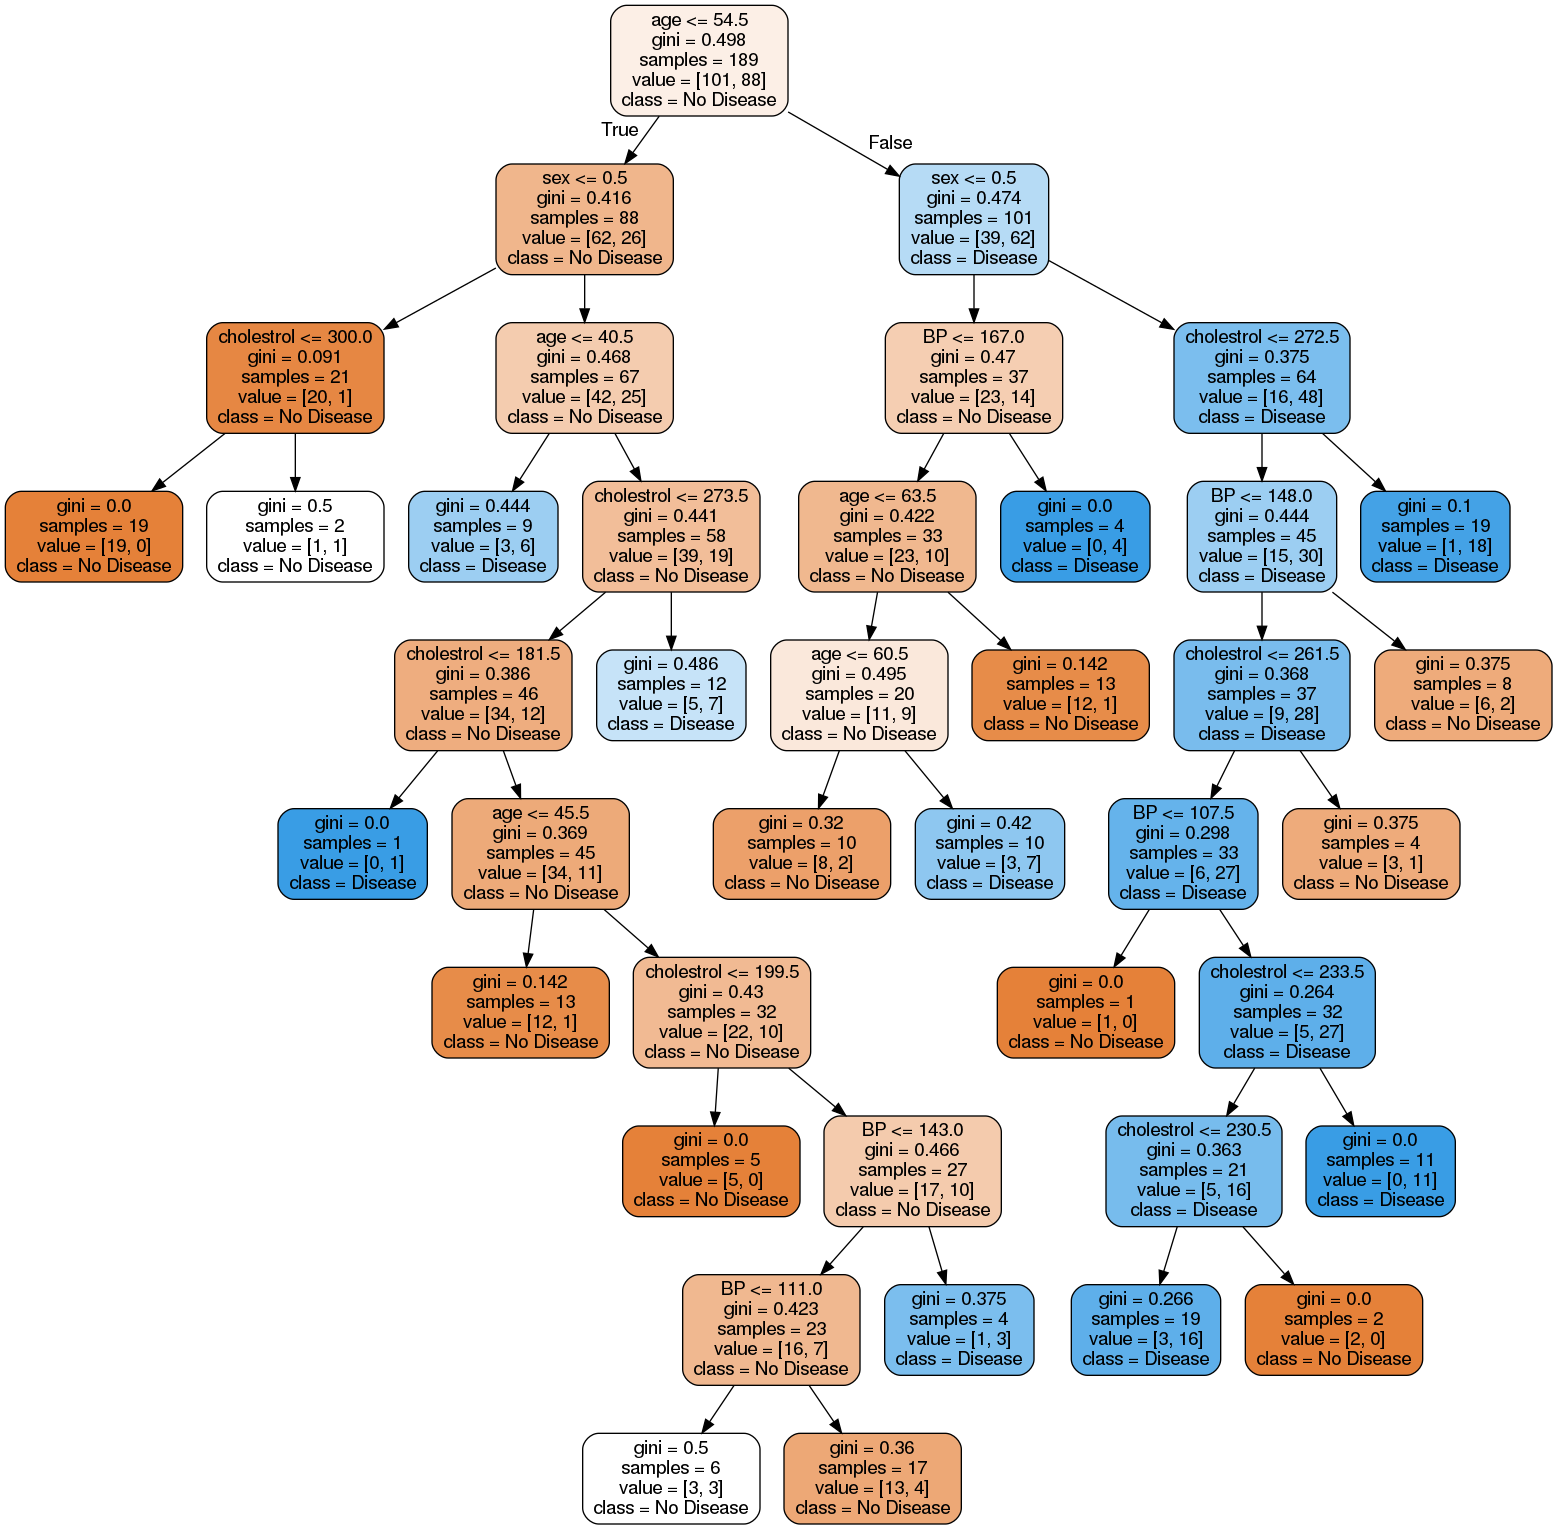

In [30]:
# plot the tree
gph = get_dt_graph(dt_min_split)
Image(gph.create_png())

In [31]:
# evaluate the model
evaluate_model(dt_min_split)

Train accuracy:  0.8359788359788359
Confusion Matrix of Tain data set:
[[85 16]
 [15 73]]
--------------------------------------------------
Test Accuracy:  0.6419753086419753
Confusion Matrix of Test Data set:
[[32 17]
 [12 20]]


#### Using minimum samples in leaf node

In [32]:
# create a model
dt_min_leaf = DecisionTreeClassifier(min_samples_leaf=20)

# fit the model
dt_min_leaf.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=20)

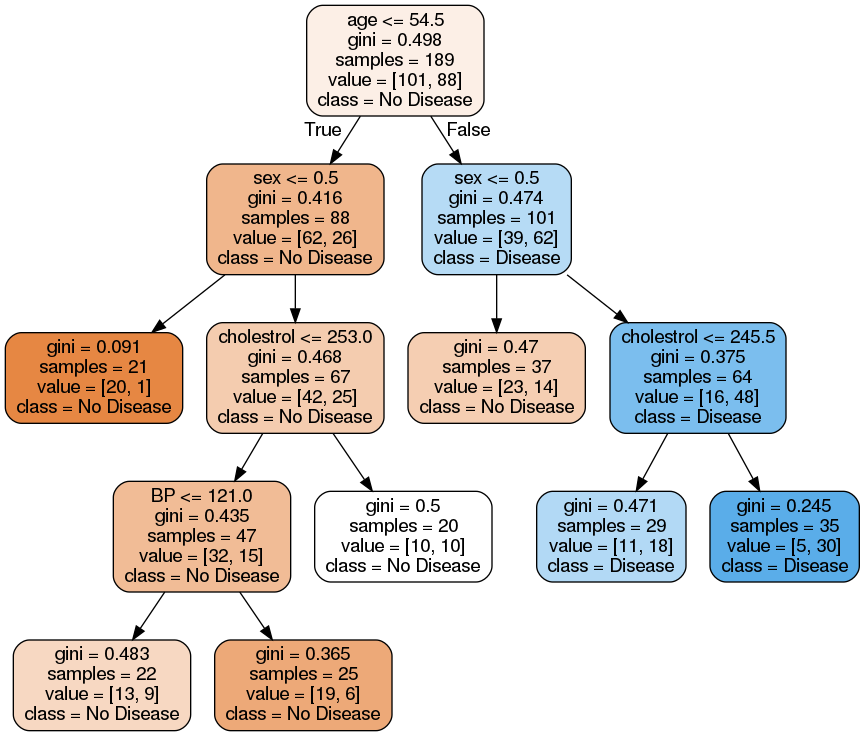

In [33]:
# plot the tree
gph = get_dt_graph(dt_min_leaf)
Image(gph.create_png())

In [34]:
# evaluate the model
evaluate_model(dt_min_leaf)

Train accuracy:  0.7037037037037037
Confusion Matrix of Tain data set:
[[85 16]
 [40 48]]
--------------------------------------------------
Test Accuracy:  0.6419753086419753
Confusion Matrix of Test Data set:
[[38 11]
 [18 14]]


### using entropy instead of gini

In [35]:
# create a model
dt_min_leaf_entropy = DecisionTreeClassifier(min_samples_leaf=20, random_state=42, criterion="entropy")

# fit the model
dt_min_leaf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=20,
                       random_state=42)

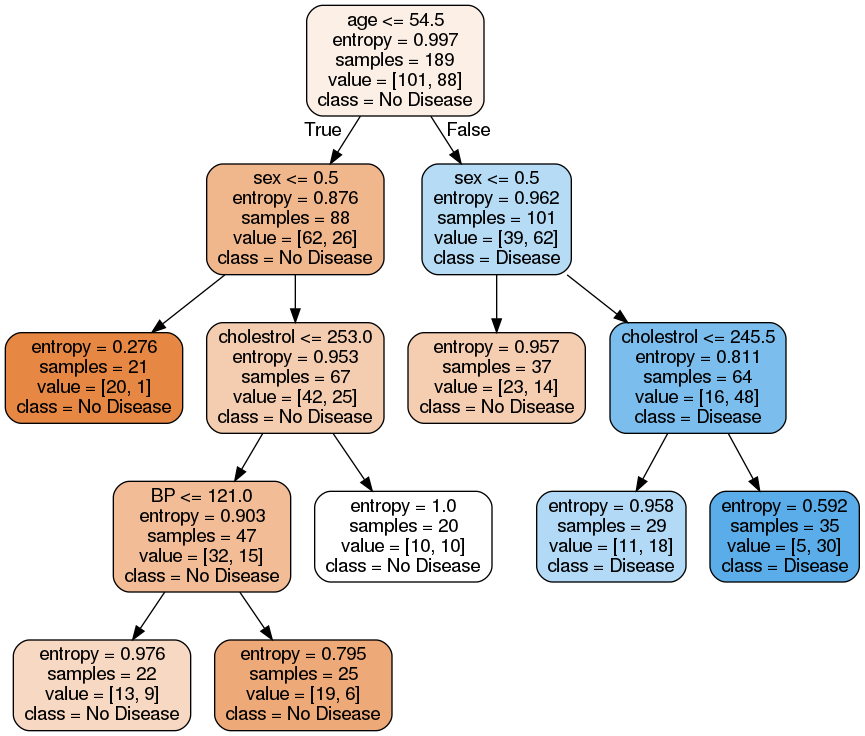

In [36]:
# plot the tree
gph = get_dt_graph(dt_min_leaf_entropy)
Image(gph.create_png())

In [37]:
# evaluate the model
evaluate_model(dt_min_leaf_entropy)

Train accuracy:  0.7037037037037037
Confusion Matrix of Tain data set:
[[85 16]
 [40 48]]
--------------------------------------------------
Test Accuracy:  0.6419753086419753
Confusion Matrix of Test Data set:
[[38 11]
 [18 14]]


### Hyperparameter Tunning

In [38]:
# create a model
dt = DecisionTreeClassifier(random_state=42)

In [39]:
# import the library
from sklearn.model_selection import GridSearchCV

In [40]:
# create a parameter grid based on the result of random search
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [41]:
# grid search based on f1 score
# grid_search = GridSearchCV(estimator=dt, params_grid=params, cv=4, n_jobs=-1, scoring="f1")

In [42]:
# intantiate the grid search model based on accuracy score
grid_search = GridSearchCV(estimator=dt, param_grid=params, cv=4, n_jobs=-1, scoring="accuracy")

In [43]:
%%time

# fit the model
grid_search.fit(X_train, y_train)

CPU times: user 876 ms, sys: 73.9 ms, total: 950 ms
Wall time: 3.24 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy')

In [44]:
# create a dataframe of cv results
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009603,0.000306,0.005608,0.000305,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.708333,0.744681,0.617021,0.531915,0.650488,0.082762,17
1,0.013927,0.007396,0.004990,0.000220,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.708333,0.744681,0.617021,0.531915,0.650488,0.082762,17
2,0.007089,0.000108,0.004842,0.000029,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.687500,0.744681,0.617021,0.531915,0.645279,0.079551,20
3,0.009156,0.002826,0.004454,0.000740,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.666667,0.680851,0.574468,0.702128,0.656028,0.048751,3
4,0.005447,0.000970,0.003820,0.000837,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.541667,0.531915,0.531915,0.531915,0.534353,0.004223,41


In [45]:
# get the first 5 best mean_test_score
score_df.nlargest(5, "mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
30,0.007134,0.000044,0.004868,0.000022,entropy,3,5,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.604167,0.765957,0.617021,0.680851,0.666999,0.064090,1
5,0.006032,0.001118,0.004175,0.000818,gini,3,5,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.625000,0.744681,0.595745,0.659574,0.656250,0.055831,2
3,0.009156,0.002826,0.004454,0.000740,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.666667,0.680851,0.574468,0.702128,0.656028,0.048751,3
8,0.006610,0.000454,0.004854,0.001478,gini,3,50,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.666667,0.680851,0.574468,0.702128,0.656028,0.048751,3
13,0.006495,0.000653,0.004771,0.000003,gini,5,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.666667,0.680851,0.574468,0.702128,0.656028,0.048751,3


In [46]:
# get the best estimator
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=42)

In [47]:
# evaluate model on best estimator

dt_best = grid_search.best_estimator_

evaluate_model(dt_best)

Train accuracy:  0.7195767195767195
Confusion Matrix of Tain data set:
[[82 19]
 [34 54]]
--------------------------------------------------
Test Accuracy:  0.6172839506172839
Confusion Matrix of Test Data set:
[[36 13]
 [18 14]]


In [48]:
# import the library
from sklearn.metrics import classification_report

In [49]:
print(classification_report(y_test, dt_best.predict(X_test)))

              precision    recall  f1-score   support

           0       0.67      0.73      0.70        49
           1       0.52      0.44      0.47        32

    accuracy                           0.62        81
   macro avg       0.59      0.59      0.59        81
weighted avg       0.61      0.62      0.61        81



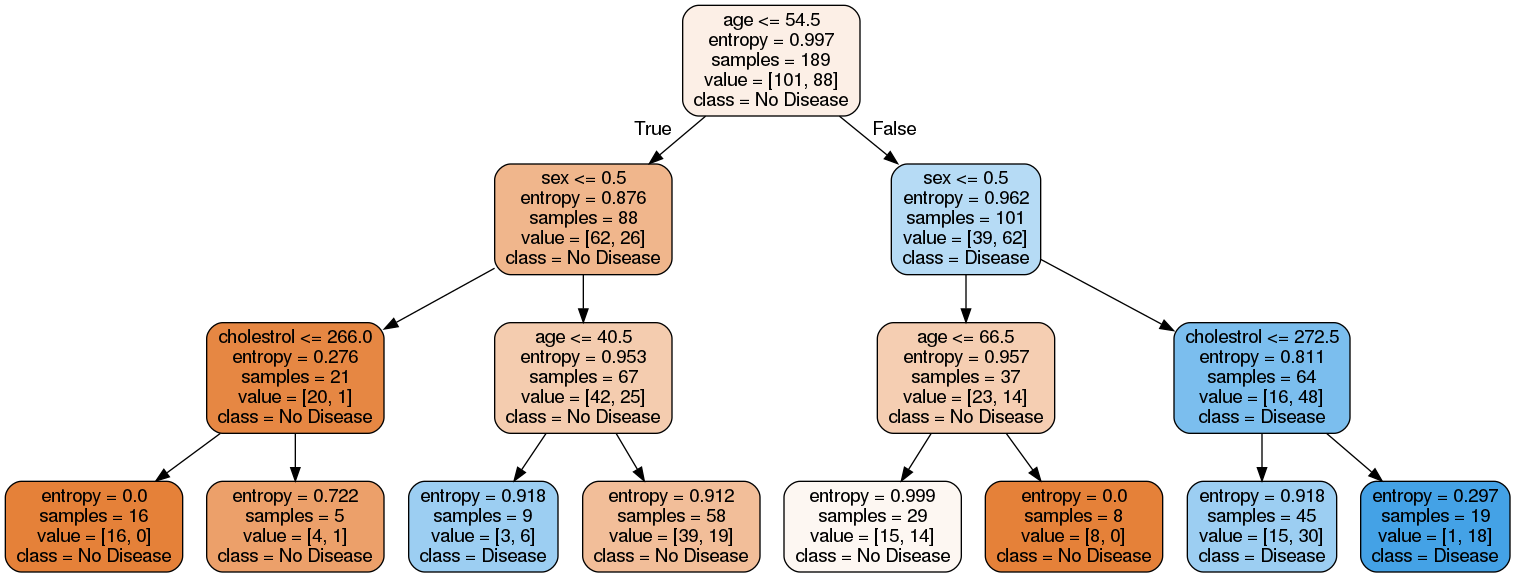

In [50]:
# plot the graph
gph = get_dt_graph(dt_best)
Image(gph.create_png())

## Random Forests

In [51]:
# Import the library of random forests
from sklearn.ensemble import RandomForestClassifier

In [52]:
# create the random forest model
rf = RandomForestClassifier(random_state=42, n_estimators=10, max_depth=3)

In [53]:
# fit the model
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=10, random_state=42)

In [54]:
# get all the estimators
rf.estimators_

[DecisionTreeClassifier(max_depth=3, max_features='auto',
                        random_state=1608637542),
 DecisionTreeClassifier(max_depth=3, max_features='auto',
                        random_state=1273642419),
 DecisionTreeClassifier(max_depth=3, max_features='auto',
                        random_state=1935803228),
 DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=787846414),
 DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=996406378),
 DecisionTreeClassifier(max_depth=3, max_features='auto',
                        random_state=1201263687),
 DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=423734972),
 DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=415968276),
 DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=670094950),
 DecisionTreeClassifier(max_depth=3, max_features='auto',
                        random_state=1914837113)]

In [55]:
# get one estimator
rf.estimators_[0]

DecisionTreeClassifier(max_depth=3, max_features='auto',
                       random_state=1608637542)

In [56]:
# get the 5th estimator
sample_tree = rf.estimators_[4]

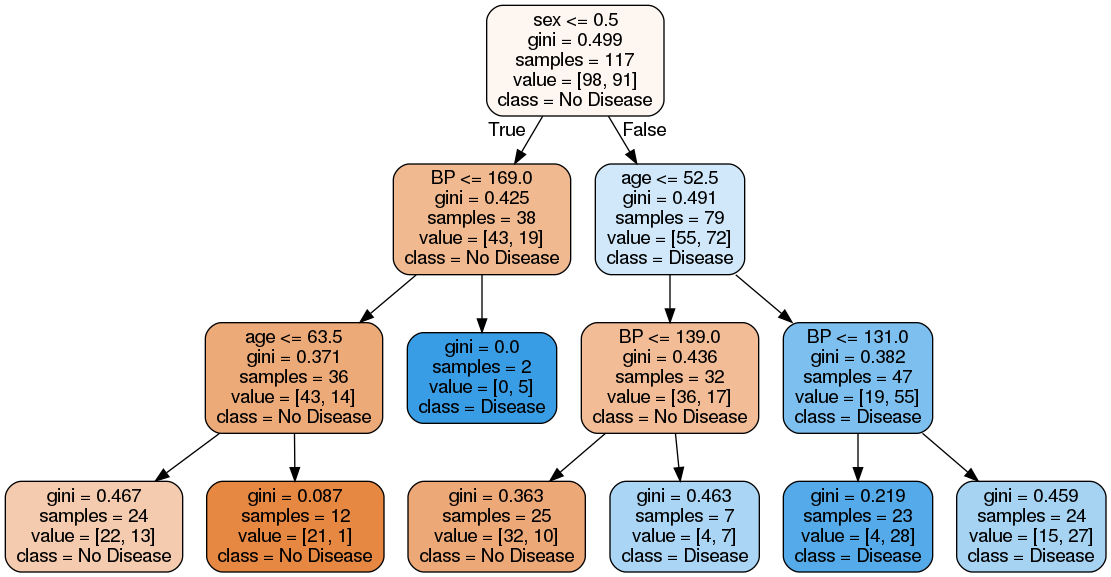

In [57]:
# plot the tree
gph = get_dt_graph(sample_tree)
Image(gph.create_png())

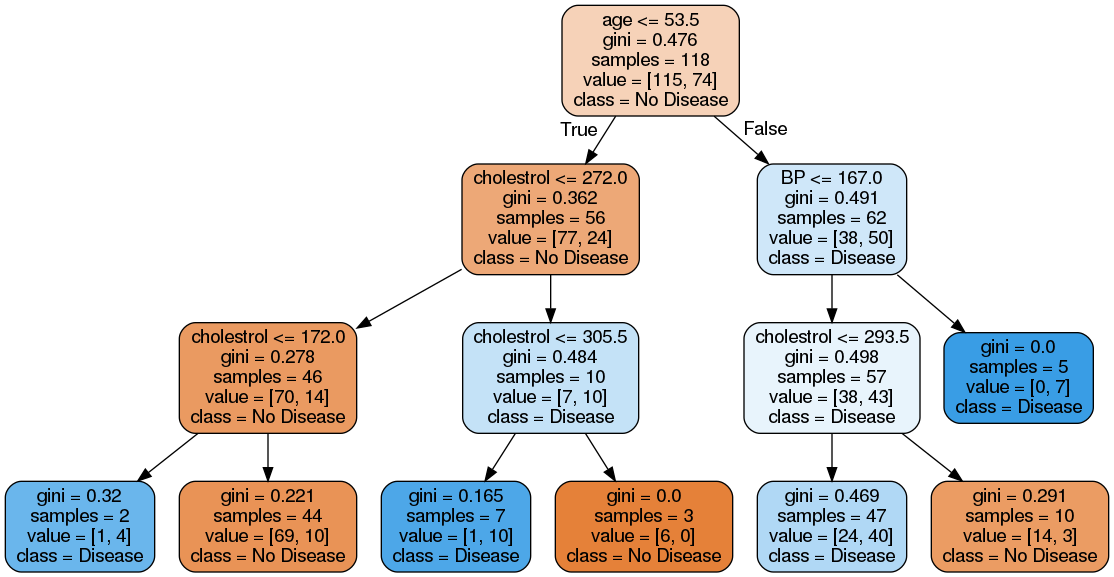

In [58]:
# plot the 3rd estimator
gph = get_dt_graph(rf.estimators_[2])
Image(gph.create_png(), width=700, height=700)

In [59]:
# evaluate the random forest
evaluate_model(rf)

Train accuracy:  0.7407407407407407
Confusion Matrix of Tain data set:
[[80 21]
 [28 60]]
--------------------------------------------------
Test Accuracy:  0.6172839506172839
Confusion Matrix of Test Data set:
[[35 14]
 [17 15]]


#### Grid Search for Hyperparameter Tuning

In [60]:
# create a random forest model
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [61]:
# set the params for grid search
params = {
    "max_depth": [5,10,20],
    "min_samples_leaf": [5,10, 20, 50, 100],
    "max_features": [2,3,4],
    "n_estimators": [10,30,50,100,200]
}

In [62]:
# intantiate the gird search model
grid_search = GridSearchCV(estimator=classifier_rf, param_grid=params, cv=4, n_jobs=-1, verbose=1, scoring="accuracy")

In [63]:
%%time

# fit the model
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 225 candidates, totalling 900 fits
CPU times: user 6.94 s, sys: 187 ms, total: 7.12 s
Wall time: 1min 52s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20], 'max_features': [2, 3, 4],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [64]:
# get the best estimator
rf_best = grid_search.best_estimator_

In [65]:
rf_best

RandomForestClassifier(max_depth=5, max_features=2, min_samples_leaf=10,
                       n_estimators=10, n_jobs=-1, random_state=42)

In [66]:
# evaluate the random forest
evaluate_model(rf_best)

Train accuracy:  0.7354497354497355
Confusion Matrix of Tain data set:
[[78 23]
 [27 61]]
--------------------------------------------------
Test Accuracy:  0.6296296296296297
Confusion Matrix of Test Data set:
[[33 16]
 [14 18]]


In [67]:
# get the first estimator
sample_tree = rf_best.estimators_[0]

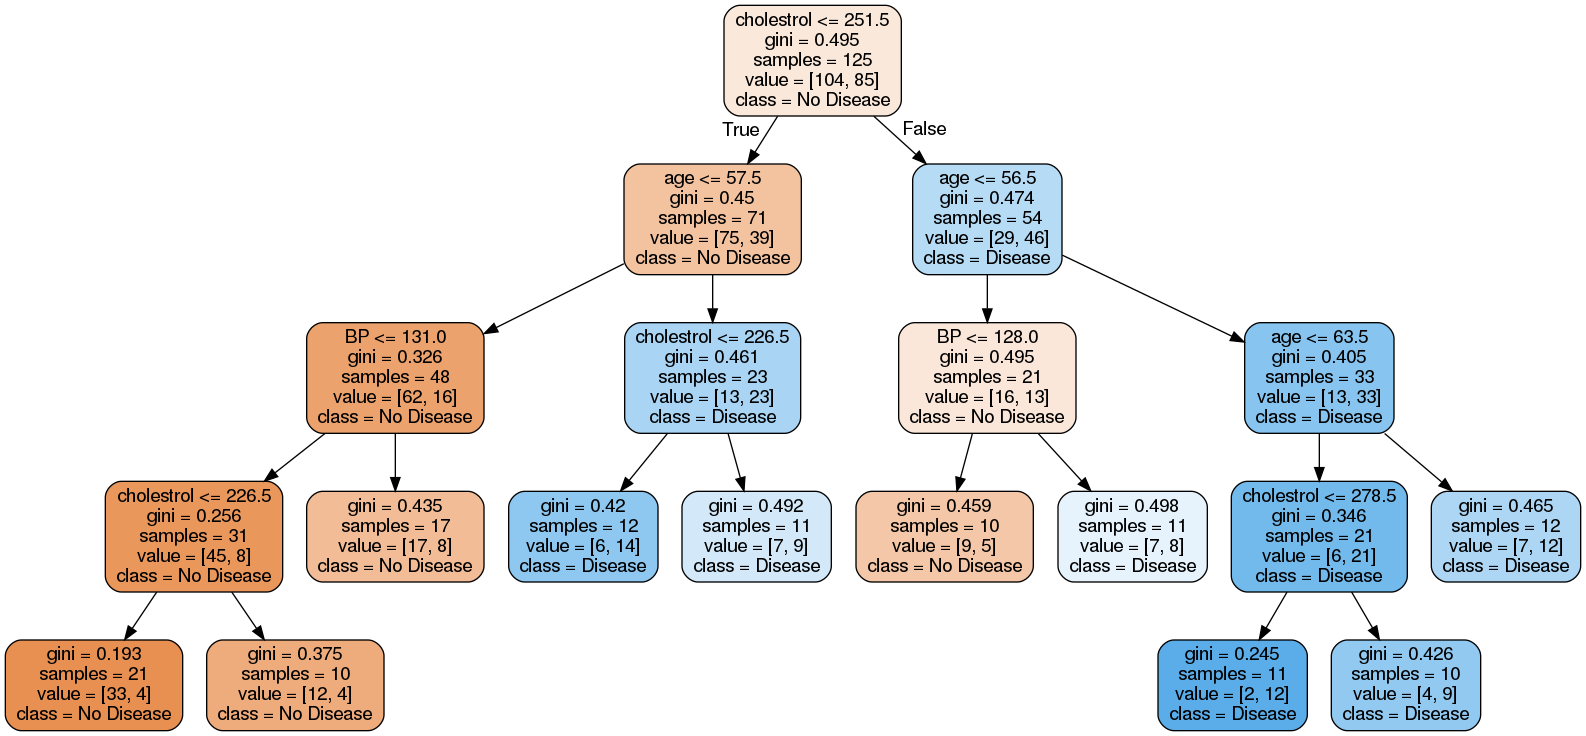

In [68]:
# plot the tree
gph = get_dt_graph(sample_tree)
Image(gph.create_png(), width=700, height=700)

In [70]:
rf_best.estimators_

[DecisionTreeClassifier(max_depth=5, max_features=2, min_samples_leaf=10,
                        random_state=1608637542),
 DecisionTreeClassifier(max_depth=5, max_features=2, min_samples_leaf=10,
                        random_state=1273642419),
 DecisionTreeClassifier(max_depth=5, max_features=2, min_samples_leaf=10,
                        random_state=1935803228),
 DecisionTreeClassifier(max_depth=5, max_features=2, min_samples_leaf=10,
                        random_state=787846414),
 DecisionTreeClassifier(max_depth=5, max_features=2, min_samples_leaf=10,
                        random_state=996406378),
 DecisionTreeClassifier(max_depth=5, max_features=2, min_samples_leaf=10,
                        random_state=1201263687),
 DecisionTreeClassifier(max_depth=5, max_features=2, min_samples_leaf=10,
                        random_state=423734972),
 DecisionTreeClassifier(max_depth=5, max_features=2, min_samples_leaf=10,
                        random_state=415968276),
 DecisionTre

### Variable importance in random forest and Decision Trees

In [71]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5, n_estimators=100, oob_score=True)

In [72]:
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [73]:
classifier_rf.feature_importances_

array([0.37539743, 0.13780788, 0.20834585, 0.27844883])

In [74]:
# create new data frame
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": classifier_rf.feature_importances_
})

In [75]:
# print the dataframe
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
0,age,0.375397
3,cholestrol,0.278449
2,BP,0.208346
1,sex,0.137808
